USIng Pingouin for analysis

In [14]:
import pingouin as pg
import pandas as pd 
import numpy as np
from scipy.stats import zscore
import statistics
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
%matplotlib inline

1. Check Correlation Between Variables


 For example, to analyze the relationship between Active Devices and Sessions:

In [3]:
active_devices = pd.read_csv('Hot air Baloon/Active Devices.csv')
sessions = pd.read_csv('Hot air Baloon/Session.csv')


In [4]:
merged_data= pd.merge(active_devices, sessions, on= "Date", how= "inner")

In [5]:
correlation = pg.corr(x=merged_data['Active Devices'], y=merged_data['Sessions'])
print(correlation)

          n         r         CI95%         p-val       BF10     power
pearson  61  0.627822  [0.45, 0.76]  6.110016e-08  2.624e+05  0.999891


•	Output: Correlation coefficient, p-value, and sample size.

•	Interpretation:

•	If p-value < 0.05: Significant correlation.

•	Coefficient closer to 1/-1: Strong relationship.

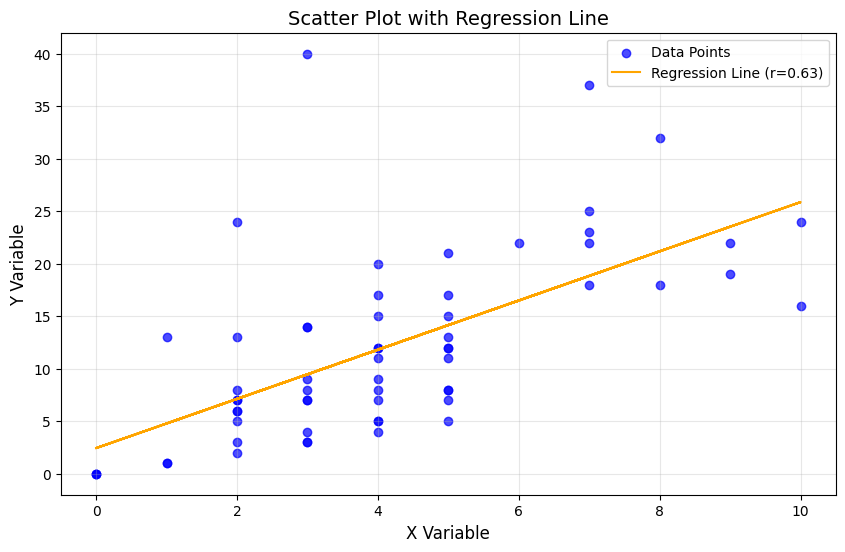

In [11]:

# Example data (replace x and y with your actual data)
x = merged_data['Active Devices'].values
y = merged_data['Sessions'].values

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data Points", color="blue", alpha=0.7)

# Fit a regression line
m, b = np.polyfit(x, y, 1)  # Linear regression
plt.plot(x, m * x + b, color="orange", label=f"Regression Line (r=0.63)")

# Add titles, labels, and legend
plt.title("Scatter Plot with Regression Line", fontsize=14)
plt.xlabel("X Variable", fontsize=12)
plt.ylabel("Y Variable", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Insights:**

1.	Positive Correlation: The regression line suggests a positive relationship between the variables. As X Variable increases, Y Variable also tends to increase.
	
2.	Correlation Strength: The correlation coefficient r = 0.63 indicates a moderate positive relationship. This means that as one variable grows, the other tends to grow, but the relationship is not perfect.
	
3.	Outliers: Some data points deviate significantly from the regression line. These may indicate special cases or noise in the data.

    Active Devices  Sessions  Active Devices Z  Sessions Z
38               3        40         -0.473434    3.176962


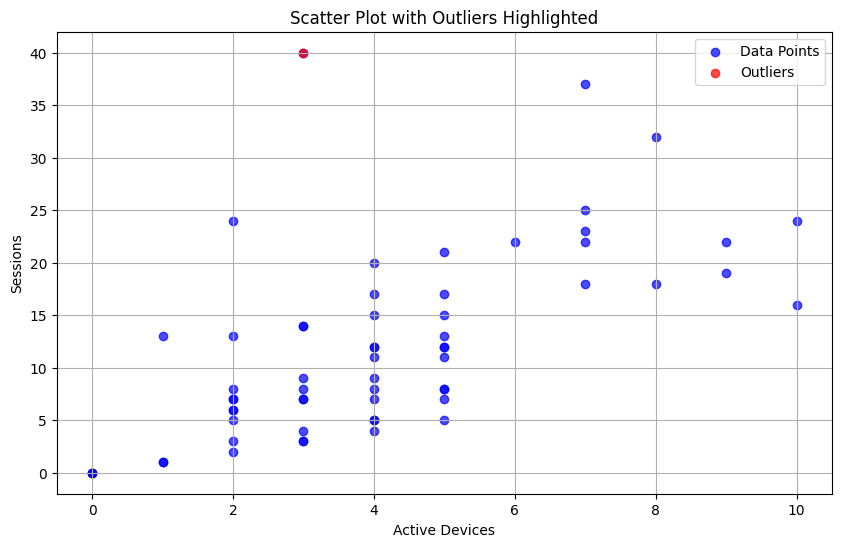

In [16]:
# Assuming `x` (Active Devices) and `y` (Sessions) are already loaded as numpy arrays
data = pd.DataFrame({'Active Devices': x, 'Sessions': y})

# Calculate z-scores for both variables to identify outliers
data['Active Devices Z'] = zscore(data['Active Devices'])
data['Sessions Z'] = zscore(data['Sessions'])

# Define a threshold for outliers (commonly z > 3 or z < -3)
threshold = 3
outliers = data[(np.abs(data['Active Devices Z']) > threshold) | 
                (np.abs(data['Sessions Z']) > threshold)]

# Display the outliers in a table
print(outliers)

# Highlight outliers in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Active Devices'], data['Sessions'], label="Data Points", color="blue", alpha=0.7)
plt.scatter(outliers['Active Devices'], outliers['Sessions'], label="Outliers", color="red", alpha=0.7)
plt.title("Scatter Plot with Outliers Highlighted")
plt.xlabel("Active Devices")
plt.ylabel("Sessions")
plt.legend()
plt.grid(True)
plt.show()

**Key Observations:**
	
1.	Outlier Identification:
	
    •	A red point (outlier) shows a session count of 40 associated with only 2 active devices. This is unusual, as session counts typically increase proportionally with the number of active devices.
2.	General Trend:
	
    •	Most data points show a positive correlation between active devices and sessions, where higher active device counts align with higher session counts.
	
    •	The outlier disrupts this trend and might indicate an anomaly in data collection, app behavior, or user activity.
3.	Potential Reasons for the Outlier:
	
    •	It could be an isolated spike due to a specific event (e.g., heavy usage by one or two users).
	
    •	An error or noise in the data recording process

In [17]:
outlier_data = data[(np.abs(data['Active Devices Z']) > threshold) | 
                    (np.abs(data['Sessions Z']) > threshold)]
print(outlier_data)

    Active Devices  Sessions  Active Devices Z  Sessions Z
38               3        40         -0.473434    3.176962


**Insights from the Outlier**

The data point identified as an outlier has the following values:
 
•	Active Devices: 3
	
•	Sessions: 40
	
•	Z-Score for Active Devices: -0.47 (close to the mean, not an extreme outlier)
	
•	Z-Score for Sessions: 3.18 (well above the threshold of 3, indicating a significant deviation)

This suggests a situation where a disproportionately high number of sessions (40) were initiated on only 3 active devices, which is highly unusual compared to the rest of the data.

**Analysis**

1.	Possible Explanations:
	
    •	Error in Data Recording: This could indicate a technical issue causing inflated session counts.
	
    •	Highly Engaged Users: A few users might have been extremely active, skewing the session data.
	
    •	Event or Testing: This might coincide with an event like a user-testing session or internal use of the app.
2.	Impact on Correlation:
	
    •	Retaining this data point inflates the correlation, as it creates an artificial association between sessions and devices.
	
    •	Removing it would give a more representative picture of typical user behavior.